•	(Ungraded) DataCamp Github Chapters: *Basic Work Flow* and *Repositories*; Read Guttag Ch 9-10
(Note: You will need to complete your github.io webpage for the final exam -- I recommend you do this now and not leave it to the exam.)

•	(Graded) Below exercise. **Part I**: Scrape weather.com for zipcode 93405 scraping the following information in red, and storing it in a csv: feel's like, high, low, wind, humidity, dewpoint, pressure, and visibility. Just store the numbers (not %, mph, NE etc.). There are many ways to scrape the information, but the BeautifulSoup methods: .find(), .findall(), .text(), as well as using the list-like structure of each element scraped can accomplish it all.

**Part II** Turn the scraper into a class called <span style="color:green"> Weather()</span> with <span style="color:green"> zip</span> as an attribute and a method that scrapes and stores the data in a csv called <span style="color:green"> to_csv()</span>. Create two instances of the class for SLO and Harlem, zips 93405 and 10026. Call the method SLO.to_csv() and Harlem.to_csv(). 

# Part I

In [2]:
# load the libraries
import csv
import urllib.request as url
from bs4 import BeautifulSoup

<!DOCTYPE doctype html>
<html data-connection-speed="4g" data-device-class="desktop" dir="ltr" itemscope="" itemtype="http://schema.org/Organization" lang="en-US" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#">
 <head itemscope="" itemtype="http://schema.org/WebSite">
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0, viewport-fit=cover" name="viewport"/>
  <script charset="UTF-8">
   window.loadNewRelic=false;(function(){var rNumber=Math.random();if(rNumber>=0.75){window.loadNewRelic=true;}if(window.loadNewRelic){window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)retur
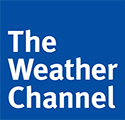

In [3]:
# save the file 
zip = '93405'
# name the url
u = "https://weather.com/weather/today/l/" + zip + ":4:US"

# first save the url to an html file
url.urlretrieve(u, "slo.html")

# now open the html file
html = open('slo.html','r').read()

html = open('.html','r').read()
#r means its readable
soup = BeautifulSoup(html, "html.parser")
a = "alice.csv"
writer = csv.writer(open(a, 'w'), dialect='excel')

# parse the html file with Beautiful Soup 
soup = BeautifulSoup(html,'html.parser')
print(soup.prettify())

In [4]:
# scrape the temperature next to "feels like". Hint: look for span tag and class deg-feels
feels_like = soup.find('span',{'class': 'deg-feels'}).text
feels_like = feels_like.strip('°')
# scrape the high and low from today. Hint search for span tag and class deg-hilo-nowcard
today = soup.find_all('span', {'class': 'deg-hilo-nowcard'})
high = today[0].text
low = today[1].text
high = high.strip('°')
low = low.strip('°')
# # scrape wind, humidity, dewpoint, pressure and visibility. Hint: search for the td tag and class ""
contents = soup.find_all('td', {'class': ''})
wind = contents[0].text
humidity = contents[1].text
dewpoint = contents[2].text
pressure = contents[3].text
visibility = contents[4].text
wind = wind[4:6]
humidity = humidity.strip('%')
dewpoint = dewpoint.strip('°')
pressure = pressure.strip(' in')
visibility = visibility.strip(' mi')
print(wind)
print(humidity)
print(dewpoint)
print(pressure)
print(visibility)

23
44
44
29.96
10.0


In [59]:
# open a csv file called 93405.csv
slo = open("93405.csv",'w')
# create a writable excel object
# your code here
file = csv.writer(slo, dialect = 'excel')
# write the first row of each column as show in the above screenshot
# your code here
file.writerow(('zip', 'feel', 'high', 'low', 'wind, mph', 'humidity, %', 'dewpoint, degrees', 'pressure, inches', 'visibility miles'))
# store the data
data = [[zip, feels_like, high, low, wind, humidity, dewpoint, pressure, visibility]]

# write the data to the csv
# your code here
for i in data:
    file.writerow((i))
    
# close the csv file
# slo.close()

# Part II - Now use the above code to write a class called Weather. 

In [62]:
class Weather():
    def __init__(self, zip):
        self.zip = str(zip)

    def to_csv(self):
        zip = str(self.zip)
        u = "https://weather.com/weather/today/l/" + zip + ":4:US"
        url.urlretrieve(u, "slo.html")

        # now open the html file
        html = open('slo.html','r').read()

        # parse the html file with Beautiful Soup 
        soup = BeautifulSoup(html,'html.parser')
        self = open('93405.csv', 'w')
        
        feels_like = soup.find('span',{'class': 'deg-feels'}).text
        feels_like = feels_like.strip('°')
        # scrape the high and low from today. Hint search for span tag and class deg-hilo-nowcard
        today = soup.find_all('span', {'class': 'deg-hilo-nowcard'})
        high = today[0].text
        low = today[1].text
        high = high.strip('°')
        low = low.strip('°')
        # # scrape wind, humidity, dewpoint, pressure and visibility. Hint: search for the td tag and class ""
        contents = soup.find_all('td', {'class': ''})
        wind = contents[0].text
        humidity = contents[1].text
        dewpoint = contents[2].text
        pressure = contents[3].text
        visibility = contents[4].text
        wind = wind[4:6]
        humidity = humidity.strip('%')
        dewpoint = dewpoint.strip('°')
        pressure = pressure.strip(' in')
        visibility = visibility.strip(' mi')
        file = csv.writer(slo, dialect = 'excel', lineterminator = '\n')
        file.writerow(('zip', 'feel', 'high', 'low', 'wind, mph', 'humidity, %', 'dewpoint, degrees', 'pressure, inches', 'visibility miles'))
        data = [[zip, feels_like, high, low, wind, humidity, dewpoint, pressure, visibility]]

        for i in data:
            file.writerow((i))

Instantiate two instances of the class Weather SLO(93405) and Harlem(10026). Call the method to_csv(). 
SLO = Weather(93405)
SLO.to_csv()

Harlem = Weather(10026)# your code here
Harlem.to_csv()# your code here

In [57]:
#Instantiate two instances of the class Weather SLO(93405) and Harlem(10026). Call the method to_csv(). 
SLO = Weather(93405)
SLO.to_csv()

Harlem = Weather(10026)# your code here
Harlem.to_csv()# your code here